# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта "Определение выгодного тарифа для телеком компании" курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — мы её уже сделали.

Необходимо построить модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверим *accuracy* на тестовой выборке самостоятельно.

# Цель исследования
1. Построить модель с максимально большим значением accuracy, которая выберет подходящий тариф.


# Ход исследования
Данные о поведении клиентов, которые уже перешли на эти тарифы мы получим из файла '/datasets/users_behavior.csv'. О качестве данных нам известно, предобработка данных совершена, поэтому сразу приступим к целям исследования и построению наилучшей модели.<br>

Таким образом, исследование пройдёт в шесть этапов:<br>

• Обзор данных<br>
• Выявление лучшей модели<br>
• Проверка качества лучшей модели <br>
• Проверка модели на вменяемость<br>
• Написание промежуточных выводов<br>
• Написание общего вывода<br>

## Откройте и изучите файл

In [2]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [3]:
#Открываем файл с данными и изучаем его
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    pass

In [3]:
#Ознакамливаемся с датафреймом
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
print(data.shape)

(3214, 5)


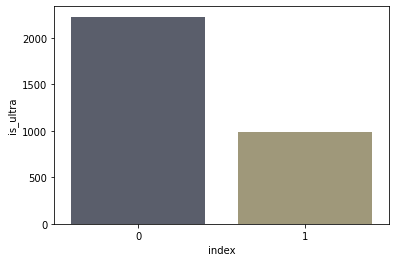

In [7]:
#Проверяем датасет на сбалансированность классов
xx  = data['is_ultra'].value_counts().reset_index()
sns.barplot(x='index', y='is_ultra', data=xx, palette='cividis');

Набор данных несбалансирован. 

In [8]:
#Находим коэффициент корреляции для всего датасета
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


###  Вывод:
Мы ознакомились с представленным датафреймом и изучили его. Всего в датафрейме 3 214 строки и 5 столбцов. Так же импортировали необходимые библиотеки и функции.

## Разбейте данные на выборки

In [9]:
#Объявим две переменные
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

#Разбиваем исходные данные на обучающую, валидационную и тестовую выборки 
#Обучающая выборка
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

#Проверяем размер выборки
print('Размер обучающей выборки:')
print(features_train.shape)
print(target_train.shape)

Размер обучающей выборки:
(1928, 4)
(1928,)


In [10]:
#Валидационная и тестовая выборки
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

#Проверяем размер выборок
print('Размер валидационной выборки:')
print(features_valid.shape)
print(target_valid.shape)

print()

print('Размер тестовой выборки:')
print(features_test.shape)
print(target_test.shape)

Размер валидационной выборки:
(643, 4)
(643,)

Размер тестовой выборки:
(643, 4)
(643,)


###  Вывод:
Мы разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 (обучающая выборка - 60% от датасета, валидационная и тестовая выборки по 20%, соответственно). 

## Исследуйте модели

### Решающее дерево

In [11]:
#Исследуем качество решающего дерева на валидационной выборке
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    if result > best_result_dt:
        best_model_dt = model
        best_result_dt = result
        best_depth_dt = depth
        
print('Accuracy лучшей модели:', best_result_dt, 'Глубина дерева:', best_depth_dt)    

Accuracy лучшей модели: 0.7853810264385692 Глубина дерева: 5


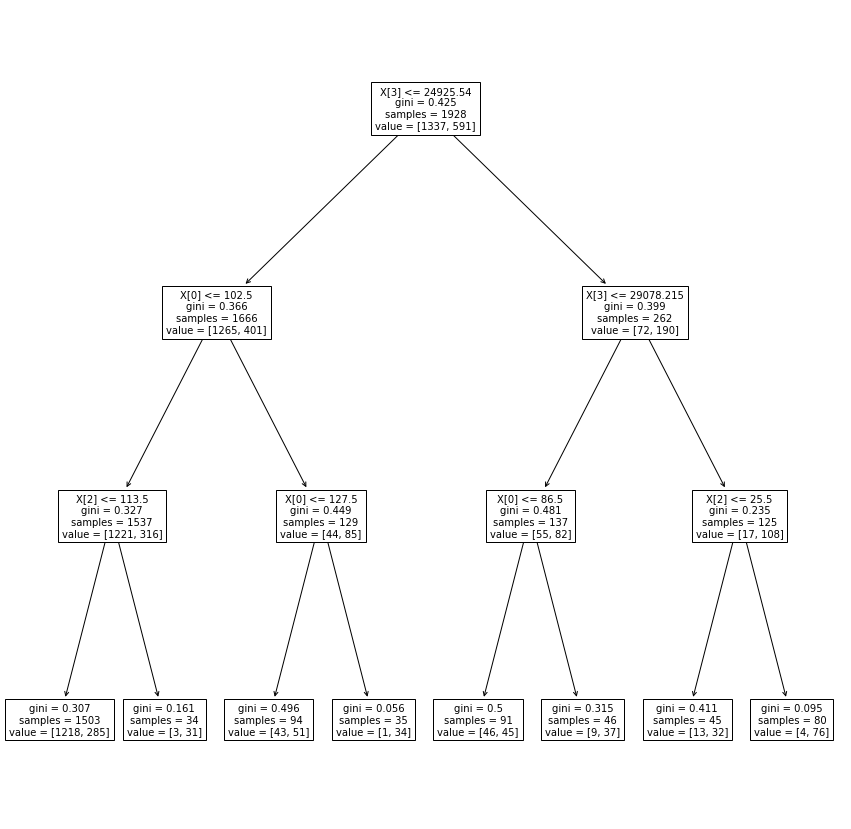

In [12]:
#Строим tree_plot
tree_plot = tree.DecisionTreeClassifier(max_depth=3) 
tree_plot.fit(features_train, target_train)

plt.figure(figsize=(15,15)) 
tree.plot_tree(tree_plot, fontsize=10)
plt.show()

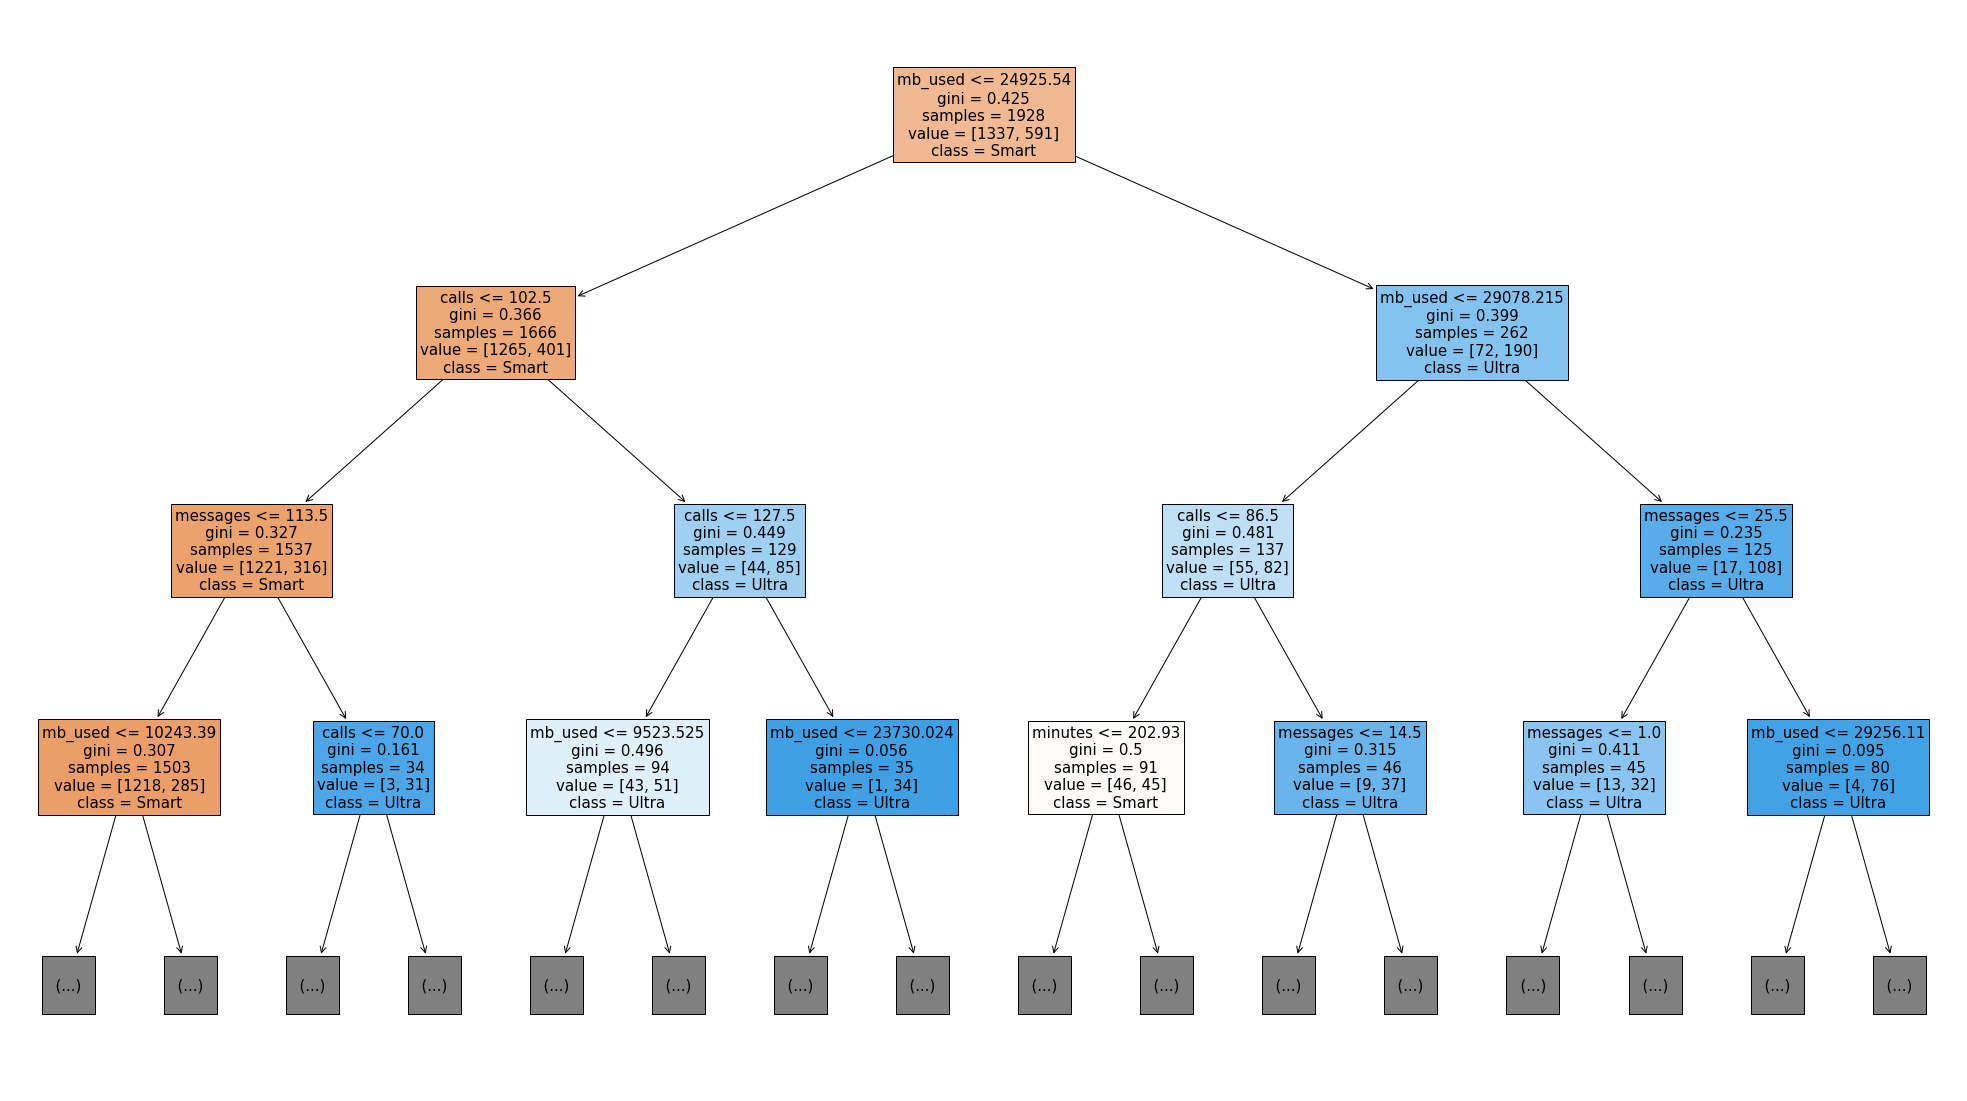

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_dt, 
               feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,
               max_depth = 3)

Метрика качества (accuracy) лучшей модели решающего дерева на валидационной выборке является 0.78 при глубине дерева 5. 

### Случайный лес

In [289]:
#Исследуем качество случайного леса на валидационной выборке
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in tqdm (range(1, 11)):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = model.score(features_valid, target_valid) 
        if result > best_result_rf:
            best_model_rf = model
            best_result_rf = result
            best_est_rf = est
            best_depth_rf = depth

print('Accuracy наилучшей модели на валидационной выборке:', best_result_rf)
print('Количество деревьев:', best_est_rf)
print('Максимальная глубина:', depth)

100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

Accuracy наилучшей модели на валидационной выборке: 0.807153965785381
Количество деревьев: 6
Максимальная глубина: 10


Accuracy наилучшей модели случайного леса на валидационной выборке: 0.81, при количестве деревьев 6 и глубине дерева 10.

### Логистическая регрессия

In [290]:
#Исследуем качество логистической регрессии на валидационной выборке
model_lg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_lg.fit(features_train, target_train) 
model_lg.predict(features_valid)
model_lg.score(features_valid, target_valid)

print('Accuracy наилучшей модели:', model_lg.score(features_valid, target_valid))

Accuracy наилучшей модели: 0.7387247278382582


Accuracy наилучшей модели логистической регрессии на валидационной выборке: 0.74.

### Вывод:
Мы исследовали качество разных моделей, меняя гиперпараметры. <br>
Наилучшей моделью оказался случайный лес - Accuracy наилучшей модели на валидационной выборке составляет: 0.807153965785381.<br>
Второй по значимости моделью является решающий лес - Accuracy лучшей модели: 0.7853810264385692.<br>
Замыкающей моделью является логистическая регрессия - Accuracy наилучшей модели 0.7387247278382582.<br>

## Проверьте модель на тестовой выборке

In [291]:
#Наилучшей моделью по Accuracy оказался случайный лес, поэтому случайный лес будем проверять на тестовой выборке
model = RandomForestClassifier(random_state=12345, max_depth = 10, n_estimators=6) 
model.fit(features_train, target_train)
model.predict(features_test)
model.score(features_test, target_test)

print('Accuracy модели:', model.score(features_test, target_test))

Accuracy модели: 0.8087091757387247


### Вывод:
Мы проверили модель на теcтовой выборке. <br>
Выявили, что наилучшей моделью по Accuracy оказался случайный лес, поэтому случайный лес мы проверили на тестовой выборке. Accuracy модели случайного леса на тестовой выборке составляет: 0.8087091757387247.

## Проверяем качество модели на тестовой выборке по нескольким метрикам

In [293]:
#Проверила качество с помощью матрицы путаницы (Confusion_matrix) на тестовой выборке 
confusion_matrix(target_test, model.predict(features_test))

array([[413,  33],
       [ 90, 107]])

In [300]:
#Проверила качество с помощью precision на тестовой выборке 
print(precision_score(target_test, model.predict(features_test), average='macro'))
print()
print(precision_score(target_test, model.predict(features_test), average='micro'))
print()
print(precision_score(target_test, model.predict(features_test), average='weighted'))
print()
print(precision_score(target_test, model.predict(features_test), average=None))

0.7926796364669129

0.8087091757387247

0.8036751055541888

[0.82107356 0.76428571]


In [299]:
#Проверила качество с помощью recall на тестовой выборке 
print(recall_score(target_test, model.predict(features_test), average='macro'))
print()
print(recall_score(target_test, model.predict(features_test), average='micro'))
print()
print(recall_score(target_test, model.predict(features_test), average='weighted'))
print()
print(recall_score(target_test, model.predict(features_test), average=None))

0.7345780883658464

0.8087091757387247

0.8087091757387247

[0.92600897 0.54314721]


In [301]:
#Проверила качество с помощью F1 на тестовой выборке 
print(f1_score(target_test, model.predict(features_test), average='macro'))
print()
print(f1_score(target_test, model.predict(features_test), average='micro'))
print()
print(f1_score(target_test, model.predict(features_test), average='weighted'))
print()
print(f1_score(target_test, model.predict(features_test), average=None))

0.7527023604418832

0.8087091757387247

0.7982765336736269

[0.87038988 0.63501484]


### Вывод:
Мы проверили качество модели с помощью метрик: precision, recall, F1 и confussion matrix. Показатели метрик находятся ближе к 1, что говори нам о том, что модель качественная. 

## (бонус) Проверьте модели на адекватность

In [275]:
#Для проверки на адекватность используем DummyClassifier
model_dummy = DummyClassifier(random_state=12345, strategy='most_frequent')
model_dummy.fit(features_train, target_train) 
model_dummy.predict(features_valid)
model_dummy.score(features_valid, target_valid)

print('Accuracy модели DummyClassifier:', model_dummy.score(features_valid, target_valid))

Accuracy модели DummyClassifier: 0.6936236391912908


### Вывод:
Мы проверили модель на адекватность (sanity check) и выявили, что Accuracy модели DummyClassifier, которая составляет 0.7060653188180405 ниже Accuracy модели RandomForestClassifier(случайный лес): 0.80248833592535, что говорит о том, что наша модель адекватна и эффективна.  

## Общий вывод:
1. Мы ознакомились с представленным датафреймом и изучили его.
2. Мы разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.
3. Мы исследовали качество разных моделей, меняя гиперпараметры:<br>
• Наилучшей моделью оказался случайный лес - Accuracy наилучшей модели на валидационной выборке составляет: 0.80248833592535; <br>
• Второй по значимости моделью является решающий лес - Accuracy лучшей модели: 0.7853810264385692;<br>
• Замыкающей моделью является логистическая регрессия - Accuracy наилучшей модели 0.7107309486780715.<br>
4. Мы проверили модель на тестовой выборке: <br>
• Выявили, что наилучшей моделью по Accuracy оказался случайный лес, поэтому случайный лес мы проверили на тестовой выборке. Accuracy модели случайного леса на тестовой выборке составляет: 0.8087091757387247.<br>
5. Мы проверили модель на адекватность (sanity check): <br>
• Accuracy модели DummyClassifier, которая составляет 0.7060653188180405 ниже Accuracy модели RandomForestClassifier: 0.80248833592535, что говорит о том, что наша модель адекватна и эффективна.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
